In [97]:
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
plt.rc("font", size=20)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#Hiding warning messages for improved presentation

from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_excel('Supervised Dataset.xlsm')

In [99]:
df.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Risk Classification,BS_SH_OUT,NUMBER_OF_DIRECTORS_ON_BOARD,NUMBER_OF_WOMEN_ON_BOARD,BOARD_MEETINGS_PER_YR,LONG_COMP_NAME,CIE_DES
0,ADM US Equity,1.432515,14.040007,0.027280,0.412265,0.702990,Low,557.000000,12.0,2.0,10.0,Archer-Daniels-Midland Co,"Archer-Daniels-Midland Company procures, trans..."
1,AE US Equity,1.156258,16.627240,0.021220,0.017248,0.771344,Low,4.217596,7.0,1.0,4.0,Adams Resources & Energy Inc,"Adams Resources & Energy, Inc. operates as an ..."
2,AGCO US Equity,1.564449,15.738426,0.010185,0.574219,0.892521,Low,79.553825,10.0,2.0,8.0,AGCO Corp,AGCO Corporation manufactures and distributes ...
3,AJRD US Equity,7.337014,17.316750,0.000000,1.582997,1.180544,High,73.600000,9.0,1.0,9.0,Aerojet Rocketdyne Holdings Inc,"Aerojet Rocketdyne Holdings, Inc. operates as ..."
4,ALG US Equity,2.099893,15.775740,0.004806,0.203644,0.822811,Low,11.534000,6.0,1.0,7.0,Alamo Group Inc,"Alamo Group Inc. designs, manufactures, and di..."


In [100]:
df=df.loc[0:119]

In [101]:
df.tail()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Risk Classification,BS_SH_OUT,NUMBER_OF_DIRECTORS_ON_BOARD,NUMBER_OF_WOMEN_ON_BOARD,BOARD_MEETINGS_PER_YR,LONG_COMP_NAME,CIE_DES
115,WERN US Equity,1.909964,19.041096,0.009293,0.100523,0.991221,Low,72.409222,9.0,1.0,4.0,Werner Enterprises Inc,"Werner Enterprises, Inc. is a transportation c..."
116,WGO US Equity,1.659115,8.788049,0.014225,0.545315,1.149083,Low,31.533000,9.0,1.0,6.0,Winnebago Industries Inc,"Winnebago Industries, Inc. manufactures motor ..."
117,WRK US Equity,1.024441,11.218686,0.036462,0.558494,1.156784,Low,253.500000,13.0,NaN,NaN,Westrock Co,WestRock Company provides corrugated packaging...
118,XPO US Equity,2.406980,28.851093,0.000000,0.890954,1.561667,High,119.900000,7.0,2.0,7.0,XPO Logistics Inc,"XPO Logistics, Inc. provides logistics service..."
119,ZBRA US Equity,8.093891,24.682474,0.000000,1.566364,1.183903,High,53.236095,8.0,1.0,7.0,Zebra Technologies Corp,Zebra Technologies Corporation designs and man...


In [102]:
df['Risk Classification'][df['Risk Classification'] == 'Low'] = 0
df['Risk Classification'][df['Risk Classification'] == 'High'] = 1


In [103]:
df['Risk Classification']=df['Risk Classification'].astype(float)

In [104]:
df.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Risk Classification,BS_SH_OUT,NUMBER_OF_DIRECTORS_ON_BOARD,NUMBER_OF_WOMEN_ON_BOARD,BOARD_MEETINGS_PER_YR,LONG_COMP_NAME,CIE_DES
0,ADM US Equity,1.432515,14.040007,0.027280,0.412265,0.702990,0.0,557.000000,12.0,2.0,10.0,Archer-Daniels-Midland Co,"Archer-Daniels-Midland Company procures, trans..."
1,AE US Equity,1.156258,16.627240,0.021220,0.017248,0.771344,0.0,4.217596,7.0,1.0,4.0,Adams Resources & Energy Inc,"Adams Resources & Energy, Inc. operates as an ..."
2,AGCO US Equity,1.564449,15.738426,0.010185,0.574219,0.892521,0.0,79.553825,10.0,2.0,8.0,AGCO Corp,AGCO Corporation manufactures and distributes ...
3,AJRD US Equity,7.337014,17.316750,0.000000,1.582997,1.180544,1.0,73.600000,9.0,1.0,9.0,Aerojet Rocketdyne Holdings Inc,"Aerojet Rocketdyne Holdings, Inc. operates as ..."
4,ALG US Equity,2.099893,15.775740,0.004806,0.203644,0.822811,0.0,11.534000,6.0,1.0,7.0,Alamo Group Inc,"Alamo Group Inc. designs, manufactures, and di..."


In [105]:
corr = df.corr()

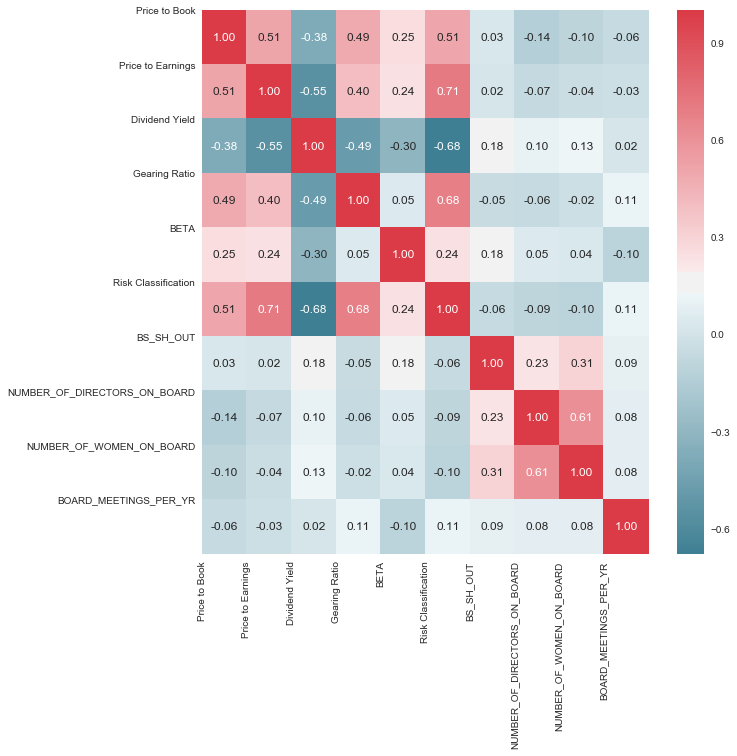

In [106]:
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [107]:
df.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Risk Classification,BS_SH_OUT,NUMBER_OF_DIRECTORS_ON_BOARD,NUMBER_OF_WOMEN_ON_BOARD,BOARD_MEETINGS_PER_YR,LONG_COMP_NAME,CIE_DES
0,ADM US Equity,1.432515,14.040007,0.027280,0.412265,0.702990,0.0,557.000000,12.0,2.0,10.0,Archer-Daniels-Midland Co,"Archer-Daniels-Midland Company procures, trans..."
1,AE US Equity,1.156258,16.627240,0.021220,0.017248,0.771344,0.0,4.217596,7.0,1.0,4.0,Adams Resources & Energy Inc,"Adams Resources & Energy, Inc. operates as an ..."
2,AGCO US Equity,1.564449,15.738426,0.010185,0.574219,0.892521,0.0,79.553825,10.0,2.0,8.0,AGCO Corp,AGCO Corporation manufactures and distributes ...
3,AJRD US Equity,7.337014,17.316750,0.000000,1.582997,1.180544,1.0,73.600000,9.0,1.0,9.0,Aerojet Rocketdyne Holdings Inc,"Aerojet Rocketdyne Holdings, Inc. operates as ..."
4,ALG US Equity,2.099893,15.775740,0.004806,0.203644,0.822811,0.0,11.534000,6.0,1.0,7.0,Alamo Group Inc,"Alamo Group Inc. designs, manufactures, and di..."


In [108]:
x = df.iloc[:, 1:6]
x.head()

,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA
0,1.432515,14.040007,0.027280,0.412265,0.702990
1,1.156258,16.627240,0.021220,0.017248,0.771344
2,1.564449,15.738426,0.010185,0.574219,0.892521
3,7.337014,17.316750,0.000000,1.582997,1.180544
4,2.099893,15.775740,0.004806,0.203644,0.822811


In [109]:
df['Risk Classification']=df['Risk Classification'].astype(int)
y=df.iloc[:, 6]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Risk Classification, dtype: int32

# Logistic Regression 

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) # Keeping 25% of records aside as test
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predicting the defaulters for test dataset and calculating the accuracy
y_pred = logreg.predict(x_test) # Contains the predictions of being High Risk or not for each record in test dataset

#logreg score compares values of dependent variable ('Risk Classification') predicted by model with actual values in test dataset
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
probs = logreg.predict_proba(x_test)[:,1]

Accuracy of logistic regression classifier on test set: 0.93
             precision    recall  f1-score   support

          0       0.94      0.94      0.94        17
          1       0.92      0.92      0.92        13

avg / total       0.93      0.93      0.93        30



In [111]:
# C : float, default: 1.0 (Inverse of regularisation strength; must be a positive float. Like in support vector machines,
# smaller values specify stronger regularisation)

# Set the parameters by cross-validation
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'C': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        17
          1       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30




# Decision Tree

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) # Keeping 25% of records aside as test
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# by gini criterion
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=4)
clf_gini.fit(x_train, y_train)

y_pred = clf_gini.predict(x_test)
y_pred

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[15  2]
 [ 0 13]]
             precision    recall  f1-score   support

          0       1.00      0.88      0.94        17
          1       0.87      1.00      0.93        13

avg / total       0.94      0.93      0.93        30



In [113]:
# By entropy criterion
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=4)
clf_entropy.fit(x_train, y_train)

y_pred_en = clf_entropy.predict(x_test)
y_pred_en

print(confusion_matrix(y_test, y_pred_en))  
print(classification_report(y_test, y_pred_en)) 


[[15  2]
 [ 0 13]]
             precision    recall  f1-score   support

          0       1.00      0.88      0.94        17
          1       0.87      1.00      0.93        13

avg / total       0.94      0.93      0.93        30



In [114]:
# Set the parameters by cross-validation
param_grid = {"max_depth": range(1,20)}

clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=100), param_grid)

clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'max_depth': 1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      0.88      0.94        17
          1       0.87      1.00      0.93        13

avg / total       0.94      0.93      0.93        30




# Random Forest

In [115]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[15  2]
 [ 0 13]]
             precision    recall  f1-score   support

          0       1.00      0.88      0.94        17
          1       0.87      1.00      0.93        13

avg / total       0.94      0.93      0.93        30



In [116]:
# Choose some parameter combinations to try
param_grid = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

clf = GridSearchCV(RandomForestClassifier(), param_grid)

clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 4}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      0.88      0.94        17
          1       0.87      1.00      0.93        13

avg / total       0.94      0.93      0.93        30




# Support Vector Machine

In [117]:
from sklearn import svm

clf = svm.SVC(kernel='linear') 

clf.fit(x_train, y_train)
clf.score(x_train, y_train)

y_pred = clf.predict(x_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 


[[16  1]
 [ 1 12]]
             precision    recall  f1-score   support

          0       0.94      0.94      0.94        17
          1       0.92      0.92      0.92        13

avg / total       0.93      0.93      0.93        30



In [118]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        17
          1       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.89      0.94      0.91        17
          1       0.92      0.85      0.88        13

avg / total       0.90      0.90      0.90        30





# Naive Bayes 

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
model = GaussianNB()

In [121]:
model.fit(x_train, y_train)

GaussianNB(priors=None)

In [122]:
y_pred = model.predict(x_test)

In [123]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.9666666666666667
             precision    recall  f1-score   support

          0       1.00      0.94      0.97        17
          1       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30

[[16  1]
 [ 0 13]]


# No gridsearch as it doesnt have hyperparameters

# K-Nearest Neighbours

In [124]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

In [125]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predicting the defaulters for test dataset and calculating the accuracy
y_pred = logreg.predict(x_test) # Contains the predictions of being High Risk or not for each record in test dataset

#logreg score compares values of dependent variable ('Risk Classification') predicted by model with actual values in test dataset
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
probs = logreg.predict_proba(x_test)[:,1]

Accuracy of logistic regression classifier on test set: 0.97
             precision    recall  f1-score   support

          0       1.00      0.94      0.97        17
          1       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30



In [126]:
# Set the parameters by cross-validation
param_grid = {"n_neighbors": range(1,20)}

clf = GridSearchCV(KNeighborsClassifier() , param_grid)

clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'n_neighbors': 3}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        17
          1       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30




# Neural Network

In [127]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output),
                                                   self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2



if __name__ == "__main__":
    x_in = np.array(x_train)
    y_in = np.array([[i] for i in np.array(y_train)])
    nn = NeuralNetwork(x_in,y_in)
    for i in range(10):
        nn.feedforward()
        nn.backprop()
    
    print('Predicted values are:')

    print(nn.output)

Predicted values are:
[[0.50000004]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.50156381]
 [1.        ]
 [0.50104406]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.55329274]
 [1.        ]
 [0.52532602]
 [0.50579797]
 [0.50000394]
 [1.        ]
 [1.        ]
 [0.5001899 ]
 [1.        ]
 [1.        ]
 [0.50051681]
 [0.5024505 ]
 [1.        ]
 [0.50003797]
 [0.51319378]
 [1.        ]
 [0.50003165]
 [0.5209561 ]
 [1.        ]
 [0.50775351]
 [1.        ]
 [1.        ]
 [0.5090994 ]
 [1.        ]
 [0.50058039]
 [0.99869936]
 [1.        ]
 [0.50267772]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.50526313]
 [0.52879869]
 [1.        ]
 [0.50101802]
 [0.50001978]
 [0.50014081]
 [0.52752148]
 [1.        ]
 [0.50626403]
 [1.        ]
 [0.50095411]
 [0.51077898]
 [1.        ]
 [1.        ]
 [0.50021944]
 [0.50003772]
 [0.50934076]
 [0.50296584]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        

In [128]:
#Getting locally imported modules from current notebook
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

      
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.8.1
scikit-learn==0.19.1
pandas==0.23.0
numpy==1.14.3
matplotlib==2.2.2
